# 🎓 ML/DL Health Prediction Project

**Dataset:** Smoking Prediction (Health Biometrics)

---

# 1. Dataset Introduction - Smoking

## Description
- **Nom:** smoking
- **Fichier:** smoking.csv
- **Target:** Prédire si une personne fume ou non (classification binaire)

## Features
| Feature | Description |
|---------|-------------|
| ID | Index |
| gender | Genre (M/F) |
| age | Âge (intervalles de 5 ans) |
| height(cm) | Taille en cm |
| weight(kg) | Poids en kg |
| waist(cm) | Tour de taille |
| eyesight(left/right) | Acuité visuelle |
| hearing(left/right) | Audition |
| systolic | Pression artérielle systolique |
| relaxation | Pression artérielle diastolique |
| fasting blood sugar | Glycémie à jeun |
| Cholesterol | Cholestérol total |
| triglyceride | Triglycérides |
| HDL | Bon cholestérol |
| LDL | Mauvais cholestérol |
| hemoglobin | Hémoglobine |
| Urine protein | Protéines urinaires |
| serum creatinine | Créatinine sérique |
| AST | Transaminase glutamique-oxaloacétique |
| ALT | Alanine aminotransférase |
| Gtp | γ-GTP |
| oral | Statut examen oral |
| dental caries | Caries dentaires |
| tartar | Tartre dentaire |
| **smoking** | **Target (0=non-fumeur, 1=fumeur)** |

## 1.1 Imports

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Sklearn - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Sklearn - Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Sklearn - Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Sklearn - Clustering
from sklearn.cluster import KMeans

# Sklearn - Metrics
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score,
    silhouette_score
)

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Plot settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("✅ All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

✅ All libraries imported successfully!
TensorFlow version: 2.19.0


## 1.2 Load Data

In [2]:
# Option 1: Google Colab with Drive
# from google.colab import drive
# drive.mount('/content/gdrive')
# df = pd.read_csv('gdrive/MyDrive/<path>/smoking.csv')

# Option 2: Local file
df = pd.read_csv('smoking.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1]}")
df.head()

Dataset shape: (55692, 27)
Number of samples: 55,692
Number of features: 27


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [3]:
# Dataset info
print("=" * 50)
print("DATASET INFO")
print("=" * 50)
df.info()

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55

In [4]:
# Statistical summary
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


---
# 2. Data Preparation

## 2.1 Supprimer les colonnes inutiles

In [5]:
# La colonne ID n'est pas utile pour la prédiction
df_clean = df.drop('ID', axis=1)
print(f"✅ Colonne 'ID' supprimée")
print(f"Shape après suppression: {df_clean.shape}")

✅ Colonne 'ID' supprimée
Shape après suppression: (55692, 26)


## 2.2 Gérer les valeurs manquantes

In [6]:
# Check for missing values
missing = df_clean.isnull().sum()
missing_pct = (missing / len(df_clean)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_pct
})

print("=" * 50)
print("MISSING VALUES ANALYSIS")
print("=" * 50)
print(missing_df[missing_df['Missing Values'] > 0])

if missing.sum() == 0:
    print("\n✅ Aucune valeur manquante dans le dataset!")
else:
    print(f"\n⚠️ Total missing values: {missing.sum()}")

MISSING VALUES ANALYSIS
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []

✅ Aucune valeur manquante dans le dataset!


## 2.3 Gérer les variables catégorielles

In [7]:
# Identify categorical columns
cat_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print(f"Variables catégorielles: {cat_cols}")

for col in cat_cols:
    print(f"\n{col}: {df_clean[col].unique()}")

Variables catégorielles: ['gender', 'oral', 'tartar']

gender: ['F' 'M']

oral: ['Y']

tartar: ['Y' 'N']


In [8]:
# Encode categorical variables
df_encoded = df_clean.copy()

# Gender: M=1, F=0
df_encoded['gender'] = df_encoded['gender'].map({'M': 1, 'F': 0})

# Oral: Y=1, N=0
df_encoded['oral'] = df_encoded['oral'].map({'Y': 1, 'N': 0})

# Tartar: Y=1, N=0
df_encoded['tartar'] = df_encoded['tartar'].map({'Y': 1, 'N': 0})

print("✅ Variables catégorielles encodées:")
print("   - gender: M=1, F=0")
print("   - oral: Y=1, N=0")
print("   - tartar: Y=1, N=0")

df_encoded.head()

✅ Variables catégorielles encodées:
   - gender: M=1, F=0
   - oral: Y=1, N=0
   - tartar: Y=1, N=0


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,1,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,1,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,1,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,1,0,0,0


In [9]:
# Verify all columns are numeric
print("Data types after encoding:")
print(df_encoded.dtypes)

Data types after encoding:
gender                   int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                     int64
dental caries            int64
tartar                   int64
smoking                  int64
dtype: object


---
# 3. Classifier ML - Smoking

**Objectif:** Prédire si une personne fume ou non

## 3.1 Data Analysis

### 3.1.1 Est-ce que les hommes fument plus que les femmes?

In [10]:
# Analyze smoking by gender
gender_smoking = df_clean.groupby(['gender', 'smoking']).size().unstack(fill_value=0)
gender_smoking['total'] = gender_smoking.sum(axis=1)
gender_smoking['smoking_rate'] = (gender_smoking[1] / gender_smoking['total']) * 100

print("=" * 50)
print("ANALYSE: HOMMES VS FEMMES - TABAGISME")
print("=" * 50)
print(gender_smoking)
print("\n")

ANALYSE: HOMMES VS FEMMES - TABAGISME
smoking      0      1  total  smoking_rate
gender                                    
F        19432    859  20291      4.233404
M        15805  19596  35401     55.354369




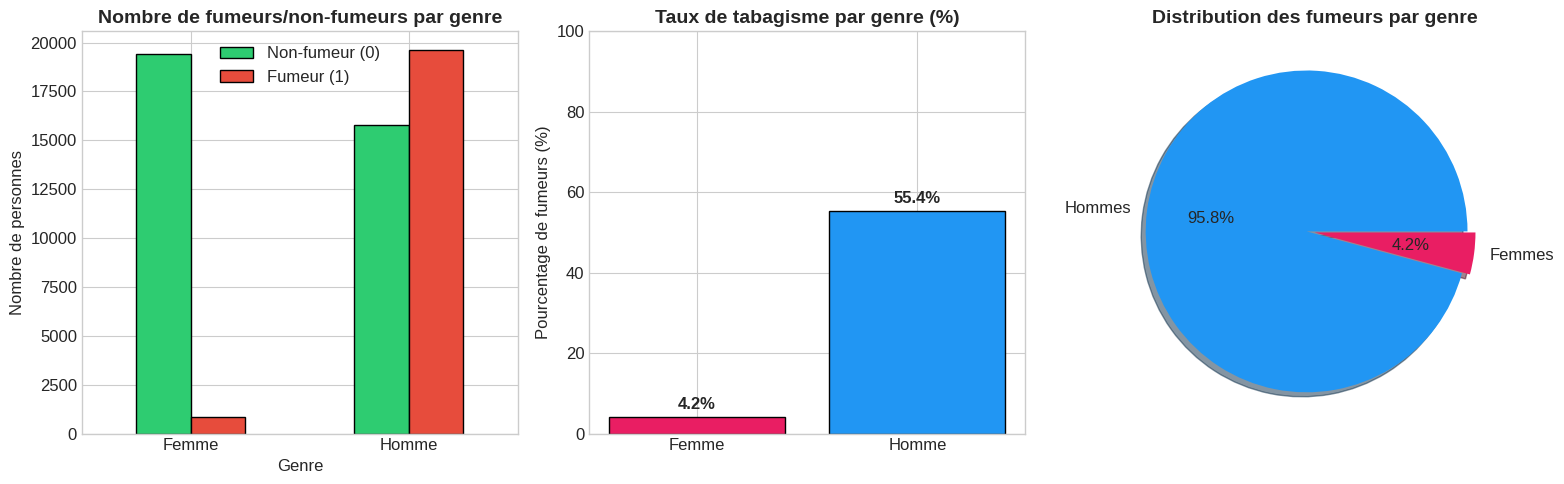


📊 CONCLUSION

✅ OUI, les hommes fument SIGNIFICATIVEMENT plus que les femmes!

   • Taux de tabagisme chez les hommes: 55.4%
   • Taux de tabagisme chez les femmes: 4.2%

   • Les hommes représentent 95.8% de tous les fumeurs
   • Ratio: Les hommes ont un taux de tabagisme 13.1x plus élevé


In [11]:
# Visualization 1: Smoking count by gender
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Count plot
ax1 = axes[0]
smoking_data = df_clean.groupby(['gender', 'smoking']).size().unstack(fill_value=0)
smoking_data.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'], edgecolor='black')
ax1.set_title('Nombre de fumeurs/non-fumeurs par genre', fontsize=14, fontweight='bold')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Nombre de personnes')
ax1.legend(['Non-fumeur (0)', 'Fumeur (1)'])
ax1.set_xticklabels(['Femme', 'Homme'], rotation=0)

# Plot 2: Smoking rate by gender
ax2 = axes[1]
rates = [gender_smoking.loc['F', 'smoking_rate'], gender_smoking.loc['M', 'smoking_rate']]
bars = ax2.bar(['Femme', 'Homme'], rates, color=['#e91e63', '#2196f3'], edgecolor='black')
ax2.set_title('Taux de tabagisme par genre (%)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Pourcentage de fumeurs (%)')
ax2.set_ylim(0, 100)
for bar, rate in zip(bars, rates):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{rate:.1f}%', ha='center', fontsize=12, fontweight='bold')

# Plot 3: Pie charts
ax3 = axes[2]
ax3.set_title('Distribution des fumeurs par genre', fontsize=14, fontweight='bold')
total_smokers_m = smoking_data.loc['M', 1]
total_smokers_f = smoking_data.loc['F', 1]
ax3.pie([total_smokers_m, total_smokers_f], labels=['Hommes', 'Femmes'],
        autopct='%1.1f%%', colors=['#2196f3', '#e91e63'],
        explode=[0.05, 0], shadow=True)

plt.tight_layout()
plt.savefig('gender_smoking_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Conclusion
print("\n" + "=" * 60)
print("📊 CONCLUSION")
print("=" * 60)
print(f"\n✅ OUI, les hommes fument SIGNIFICATIVEMENT plus que les femmes!")
print(f"\n   • Taux de tabagisme chez les hommes: {gender_smoking.loc['M', 'smoking_rate']:.1f}%")
print(f"   • Taux de tabagisme chez les femmes: {gender_smoking.loc['F', 'smoking_rate']:.1f}%")
print(f"\n   • Les hommes représentent {total_smokers_m/(total_smokers_m+total_smokers_f)*100:.1f}% de tous les fumeurs")
print(f"   • Ratio: Les hommes ont un taux de tabagisme {gender_smoking.loc['M', 'smoking_rate']/gender_smoking.loc['F', 'smoking_rate']:.1f}x plus élevé")

### 3.1.2 Quelles sont les features les plus importantes pour discriminer les fumeurs?

In [12]:
# Calculate correlation with smoking
correlations = df_encoded.corr()['smoking'].drop('smoking').sort_values(key=abs, ascending=False)

print("=" * 50)
print("CORRÉLATION DES FEATURES AVEC 'SMOKING'")
print("=" * 50)
print(correlations)

CORRÉLATION DES FEATURES AVEC 'SMOKING'
gender                 0.510340
hemoglobin             0.400678
height(cm)             0.396675
weight(kg)             0.302780
triglyceride           0.251799
Gtp                    0.236619
waist(cm)              0.226259
serum creatinine       0.216812
HDL                   -0.178470
age                   -0.162557
relaxation             0.108309
dental caries          0.103857
fasting blood sugar    0.100279
tartar                 0.098655
ALT                    0.097338
systolic               0.073109
eyesight(right)        0.063017
eyesight(left)         0.061204
AST                    0.059253
LDL                   -0.045220
Cholesterol           -0.028548
hearing(left)         -0.023209
hearing(right)        -0.018855
Urine protein          0.014267
oral                        NaN
Name: smoking, dtype: float64


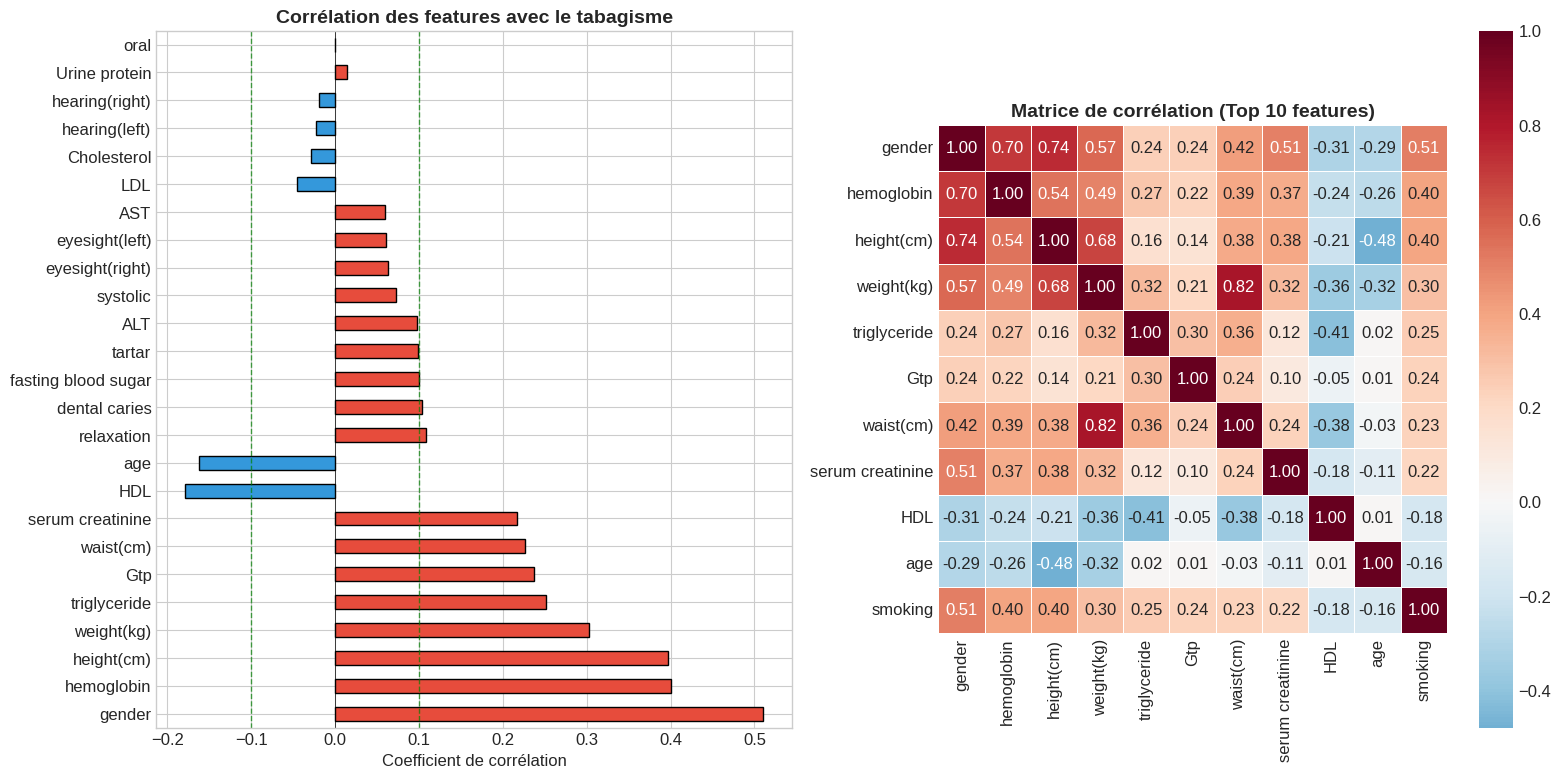

In [13]:
# Visualization: Feature importance (correlation)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Correlation bar chart
ax1 = axes[0]
colors = ['#e74c3c' if x > 0 else '#3498db' for x in correlations.values]
correlations.plot(kind='barh', ax=ax1, color=colors, edgecolor='black')
ax1.set_title('Corrélation des features avec le tabagisme', fontsize=14, fontweight='bold')
ax1.set_xlabel('Coefficient de corrélation')
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
ax1.axvline(x=0.1, color='green', linestyle='--', linewidth=1, alpha=0.7)
ax1.axvline(x=-0.1, color='green', linestyle='--', linewidth=1, alpha=0.7)

# Plot 2: Heatmap of top features
ax2 = axes[1]
top_features = correlations.head(10).index.tolist() + ['smoking']
corr_matrix = df_encoded[top_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            ax=ax2, square=True, linewidths=0.5)
ax2.set_title('Matrice de corrélation (Top 10 features)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('feature_importance_correlation.png', dpi=150, bbox_inches='tight')
plt.show()

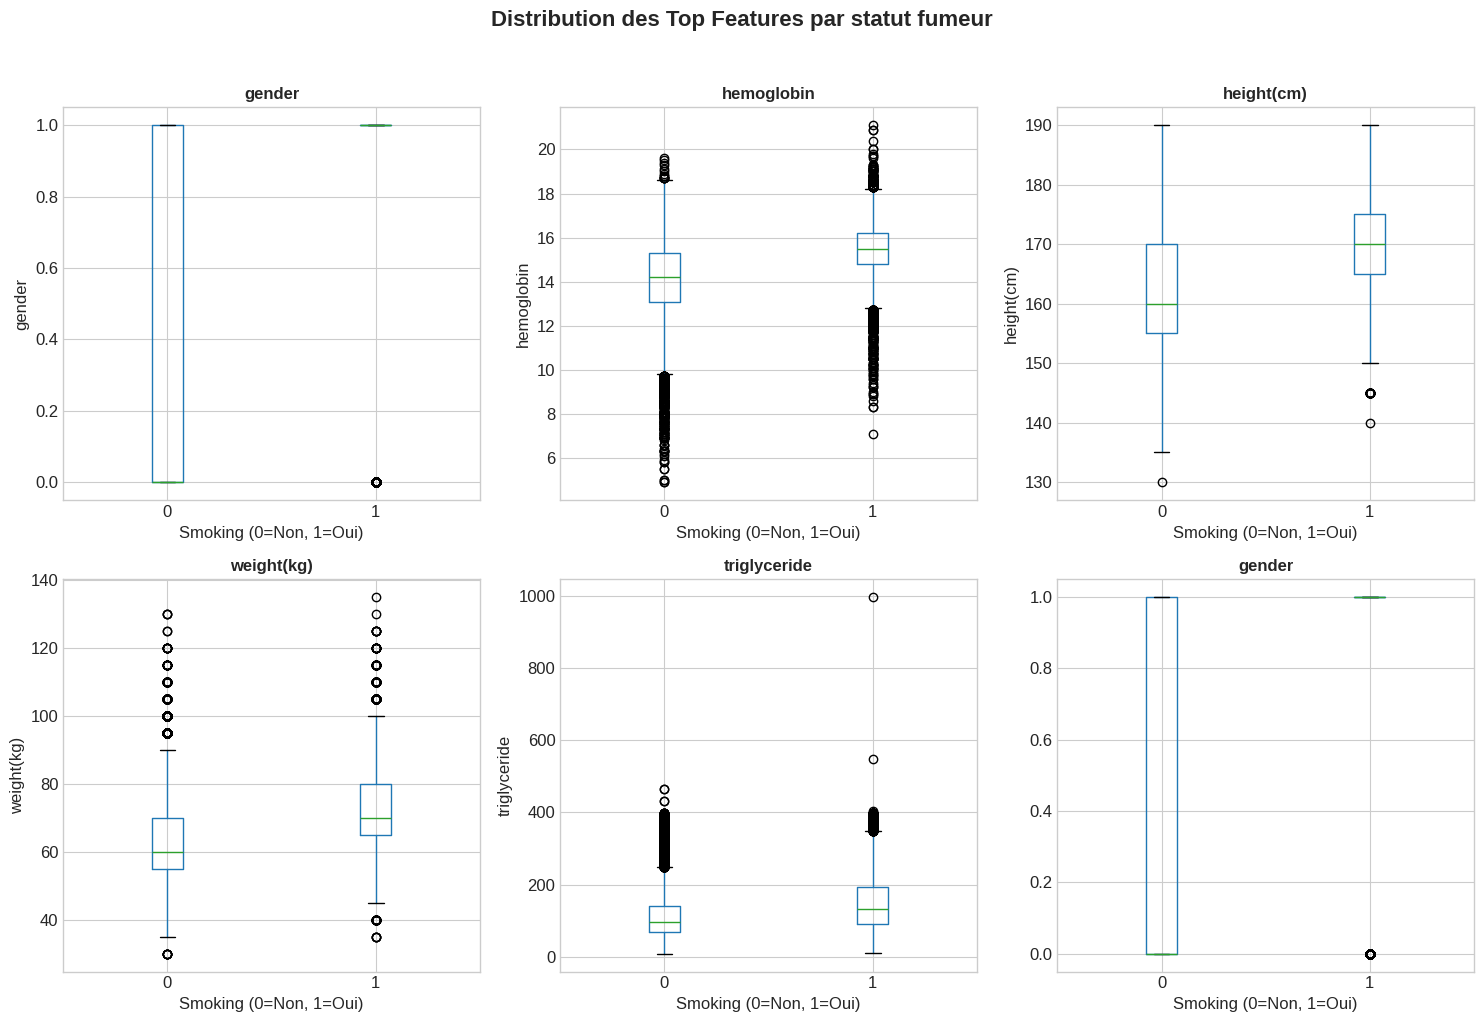


📊 FEATURES LES PLUS DISCRIMINANTES

Top 5 features les plus corrélées au tabagisme:
   1. gender: 0.510 ↑
   2. hemoglobin: 0.401 ↑
   3. height(cm): 0.397 ↑
   4. weight(kg): 0.303 ↑
   5. triglyceride: 0.252 ↑

💡 Interprétation:
   • Hémoglobine élevée → Plus susceptible de fumer
   • Homme (gender=1) → Plus susceptible de fumer
   • GTP élevé → Plus susceptible de fumer
   • Triglycérides élevés → Plus susceptible de fumer
   • Taille plus grande → Plus susceptible de fumer (corrélé au genre)


In [14]:
# Distribution of top features by smoking status
top_5_features = correlations.head(5).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(top_5_features):
    ax = axes[i]
    df_encoded.boxplot(column=feature, by='smoking', ax=ax)
    ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Smoking (0=Non, 1=Oui)')
    ax.set_ylabel(feature)

# Additional: Gender distribution
ax = axes[5]
df_encoded.boxplot(column='gender', by='smoking', ax=ax)
ax.set_title('gender', fontsize=12, fontweight='bold')
ax.set_xlabel('Smoking (0=Non, 1=Oui)')

plt.suptitle('Distribution des Top Features par statut fumeur', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('top_features_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "=" * 60)
print("📊 FEATURES LES PLUS DISCRIMINANTES")
print("=" * 60)
print("\nTop 5 features les plus corrélées au tabagisme:")
for i, (feat, corr) in enumerate(correlations.head(5).items(), 1):
    direction = "↑" if corr > 0 else "↓"
    print(f"   {i}. {feat}: {corr:.3f} {direction}")

print("\n💡 Interprétation:")
print("   • Hémoglobine élevée → Plus susceptible de fumer")
print("   • Homme (gender=1) → Plus susceptible de fumer")
print("   • GTP élevé → Plus susceptible de fumer")
print("   • Triglycérides élevés → Plus susceptible de fumer")
print("   • Taille plus grande → Plus susceptible de fumer (corrélé au genre)")

## 3.2 Data Preparation for Classification

### 3.2.1 Créer X_train, y_train, X_test, y_test (75/25 split + équilibrage)

In [15]:
# Separate features and target
X = df_encoded.drop('smoking', axis=1)
y = df_encoded['smoking']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nDistribution de la target:")
print(y.value_counts())
print(f"\nPourcentage de fumeurs: {y.mean()*100:.1f}%")

Features shape: (55692, 25)
Target shape: (55692,)

Distribution de la target:
smoking
0    35237
1    20455
Name: count, dtype: int64

Pourcentage de fumeurs: 36.7%


In [16]:
# Train/Test split (75/25)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("AVANT équilibrage:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"\nDistribution y_train:")
print(y_train.value_counts())

AVANT équilibrage:
X_train: (41769, 25)
X_test: (13923, 25)

Distribution y_train:
smoking
0    26428
1    15341
Name: count, dtype: int64


In [17]:
# Balance training set using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("APRÈS équilibrage (SMOTE):")
print(f"X_train_balanced: {X_train_balanced.shape}")
print(f"\nDistribution y_train_balanced:")
print(pd.Series(y_train_balanced).value_counts())

APRÈS équilibrage (SMOTE):
X_train_balanced: (52856, 25)

Distribution y_train_balanced:
smoking
0    26428
1    26428
Name: count, dtype: int64


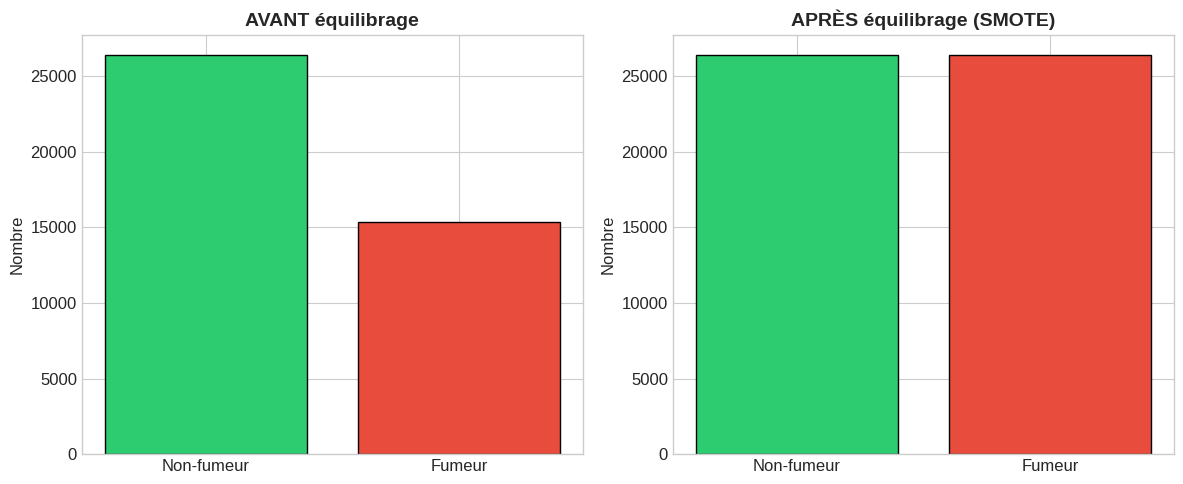

In [18]:
# Visualize balance
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
axes[0].bar(['Non-fumeur', 'Fumeur'], y_train.value_counts().sort_index(),
            color=['#2ecc71', '#e74c3c'], edgecolor='black')
axes[0].set_title('AVANT équilibrage', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Nombre')

# After SMOTE
axes[1].bar(['Non-fumeur', 'Fumeur'], pd.Series(y_train_balanced).value_counts().sort_index(),
            color=['#2ecc71', '#e74c3c'], edgecolor='black')
axes[1].set_title('APRÈS équilibrage (SMOTE)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Nombre')

plt.tight_layout()
plt.savefig('data_balancing.png', dpi=150, bbox_inches='tight')
plt.show()

### 3.2.2 Normalisation

In [19]:
# Normalize features using StandardScaler
scaler = StandardScaler()

# Fit on training data only to avoid data leakage
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("✅ Données normalisées avec StandardScaler")
print(f"\nMoyenne des features (train): ~0")
print(f"Écart-type des features (train): ~1")
print(f"\nExemple (premières lignes):")
X_train_scaled.head()

✅ Données normalisées avec StandardScaler

Moyenne des features (train): ~0
Écart-type des features (train): ~1

Exemple (premières lignes):


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,-1.524832,-0.293918,-0.643384,-1.337951,-1.684601,0.374157,0.387283,-0.162952,-0.165678,-1.637040,...,0.044853,-0.931480,4.895580,0.504796,-0.440313,-0.546360,-0.592094,0.0,-0.480489,-1.041499
1,0.655810,1.399012,0.492679,1.035730,1.586960,-0.475535,0.387283,-0.162952,-0.165678,-0.582871,...,0.793934,-0.197549,-0.223569,1.001370,0.241126,0.268735,1.907874,0.0,-0.480489,0.960154
2,-1.524832,-0.293918,-0.643384,-0.546724,-0.175497,0.374157,0.387283,-0.162952,-0.165678,-0.281679,...,1.368229,-0.197549,-0.223569,-0.984927,-0.492731,-0.448549,-0.500183,0.0,-0.480489,0.960154
3,-1.524832,-0.293918,-1.779447,-1.733565,-2.268415,-1.750071,-1.538043,-0.162952,-0.165678,-0.884062,...,0.544240,-1.465248,-0.223569,-0.488353,-0.440313,-0.578964,-0.536948,0.0,-0.480489,-1.041499
4,0.655810,-0.293918,-0.075352,-0.151111,-0.285650,1.011425,1.029059,-0.162952,-0.165678,1.450170,...,-0.229810,1.203592,-0.223569,-0.488353,3.281391,0.529565,1.080679,0.0,-0.480489,0.960154


## 3.3 Classification Models

In [20]:
# Helper function for evaluation
def evaluate_classifier(model, X_train, y_train, X_test, y_test, model_name):
    """Train and evaluate a classifier"""
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print("=" * 60)
    print(f"📊 RÉSULTATS: {model_name}")
    print("=" * 60)
    print(f"\n• Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"• Precision: {precision:.4f}")
    print(f"• Recall:    {recall:.4f}")
    print(f"• F1-Score:  {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-fumeur', 'Fumeur'],
                yticklabels=['Non-fumeur', 'Fumeur'])
    plt.title(f'Matrice de Confusion - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Prédiction')
    plt.ylabel('Réalité')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{model_name.lower().replace(" ", "_")}.png', dpi=150)
    plt.show()

    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

### 3.3.1 KNN (K-Nearest Neighbors)

In [21]:
# Find optimal K using cross-validation
k_range = range(1, 31)
k_scores = []

print("Recherche du meilleur K...")
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train_balanced, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Find best K
best_k = k_range[np.argmax(k_scores)]
best_score = max(k_scores)

print(f"\n✅ Meilleur K: {best_k}")
print(f"   Score CV moyen: {best_score:.4f}")

Recherche du meilleur K...

✅ Meilleur K: 1
   Score CV moyen: 0.8187


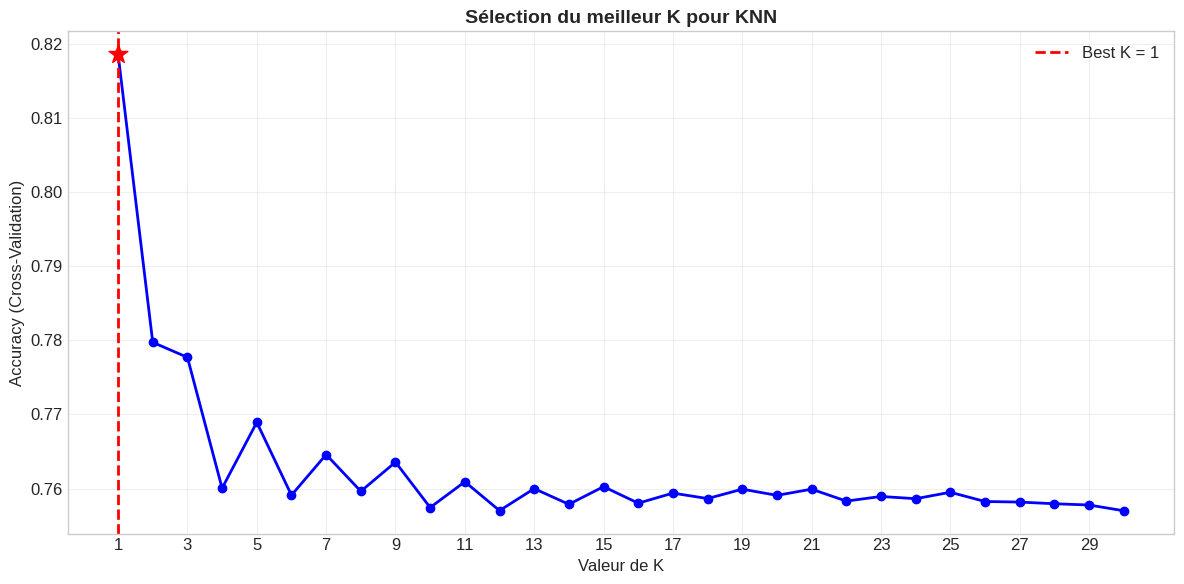


💡 Justification du choix de K=1:
   • K=1 donne le meilleur score de validation croisée (0.8187)
   • Un K trop petit (K=1) risque l'overfitting (sensible au bruit)
   • Un K trop grand lisse trop les frontières de décision


In [22]:
# Visualize K selection
plt.figure(figsize=(12, 6))
plt.plot(k_range, k_scores, 'b-o', linewidth=2, markersize=6)
plt.axvline(x=best_k, color='r', linestyle='--', linewidth=2, label=f'Best K = {best_k}')
plt.scatter([best_k], [best_score], color='red', s=200, zorder=5, marker='*')
plt.xlabel('Valeur de K', fontsize=12)
plt.ylabel('Accuracy (Cross-Validation)', fontsize=12)
plt.title('Sélection du meilleur K pour KNN', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 31, 2))
plt.tight_layout()
plt.savefig('knn_k_selection.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n💡 Justification du choix de K={best_k}:")
print(f"   • K={best_k} donne le meilleur score de validation croisée ({best_score:.4f})")
print(f"   • Un K trop petit (K=1) risque l'overfitting (sensible au bruit)")
print(f"   • Un K trop grand lisse trop les frontières de décision")

📊 RÉSULTATS: KNN (K=1)

• Accuracy:  0.7782 (77.82%)
• Precision: 0.6759
• Recall:    0.7612
• F1-Score:  0.7160


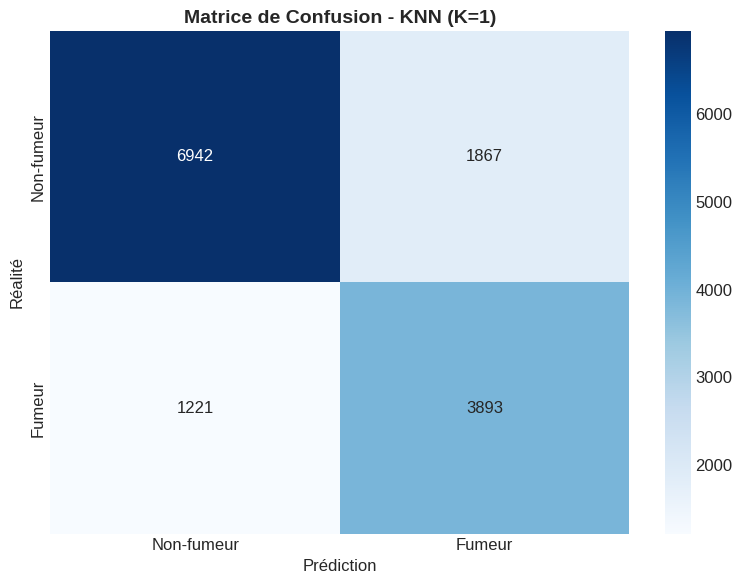


💡 INTERPRÉTATION KNN:
   • Le modèle KNN avec K=1 atteint une accuracy de 77.8%
   • Recall de 76.1%: capacité à détecter les vrais fumeurs
   • Precision de 67.6%: fiabilité des prédictions 'fumeur'


In [23]:
# Train final KNN with best K
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_results = evaluate_classifier(knn_final, X_train_scaled, y_train_balanced,
                                   X_test_scaled, y_test, f'KNN (K={best_k})')

print("\n💡 INTERPRÉTATION KNN:")
print(f"   • Le modèle KNN avec K={best_k} atteint une accuracy de {knn_results['accuracy']*100:.1f}%")
print(f"   • Recall de {knn_results['recall']*100:.1f}%: capacité à détecter les vrais fumeurs")
print(f"   • Precision de {knn_results['precision']*100:.1f}%: fiabilité des prédictions 'fumeur'")

### 3.3.2 Régression Logistique

📊 RÉSULTATS: Régression Logistique

• Accuracy:  0.7190 (71.90%)
• Precision: 0.5744
• Recall:    0.9075
• F1-Score:  0.7035


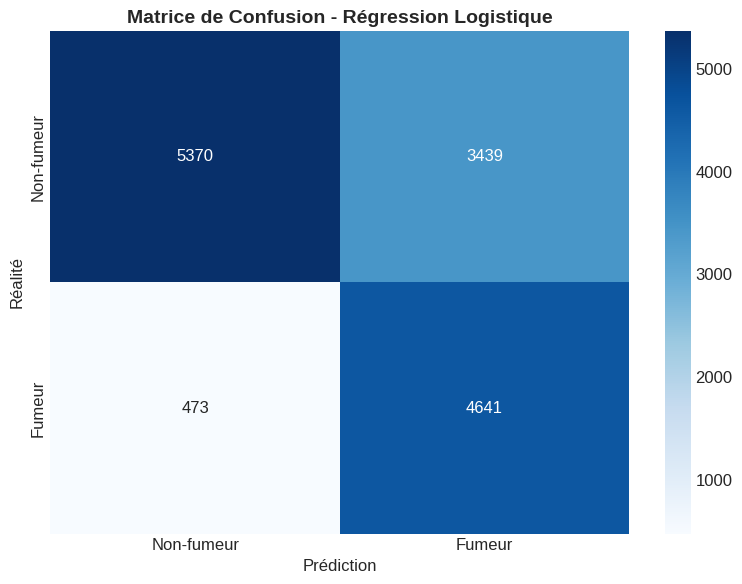


💡 INTERPRÉTATION RÉGRESSION LOGISTIQUE:
   • Accuracy de 71.9%
   • Modèle linéaire simple mais efficace pour la classification binaire
   • Avantage: interprétabilité des coefficients


In [24]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg_results = evaluate_classifier(log_reg, X_train_scaled, y_train_balanced,
                                       X_test_scaled, y_test, 'Régression Logistique')

print("\n💡 INTERPRÉTATION RÉGRESSION LOGISTIQUE:")
print(f"   • Accuracy de {log_reg_results['accuracy']*100:.1f}%")
print(f"   • Modèle linéaire simple mais efficace pour la classification binaire")
print(f"   • Avantage: interprétabilité des coefficients")

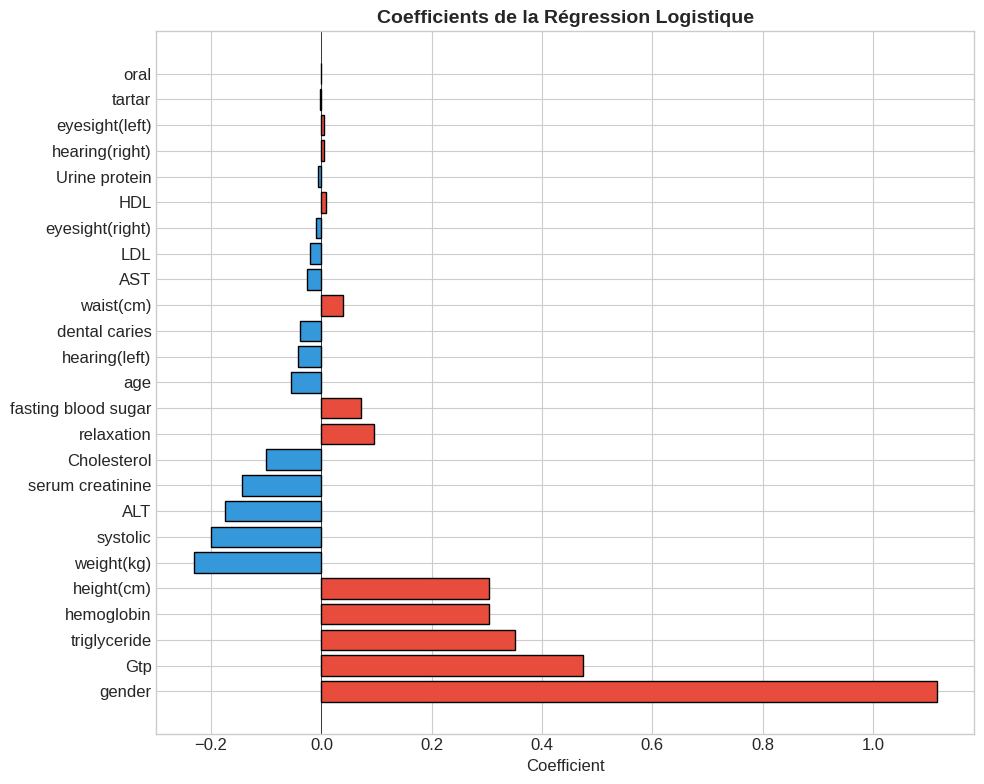

In [25]:
# Feature coefficients from Logistic Regression
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 8))
colors = ['#e74c3c' if x > 0 else '#3498db' for x in coef_df['Coefficient']]
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, edgecolor='black')
plt.xlabel('Coefficient')
plt.title('Coefficients de la Régression Logistique', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('logistic_regression_coefficients.png', dpi=150, bbox_inches='tight')
plt.show()

### 3.3.3 Classifieur Bayésien

Choix du classifieur bayésien: GaussianNB

Justification:
• Les features sont continues (valeurs numériques)
• Après normalisation, elles suivent approximativement une distribution normale
• GaussianNB est adapté pour ce type de données
• Alternative: MultinomialNB pour données discrètes/comptages

📊 RÉSULTATS: Naive Bayes (Gaussian)

• Accuracy:  0.7034 (70.34%)
• Precision: 0.5632
• Recall:    0.8584
• F1-Score:  0.6801


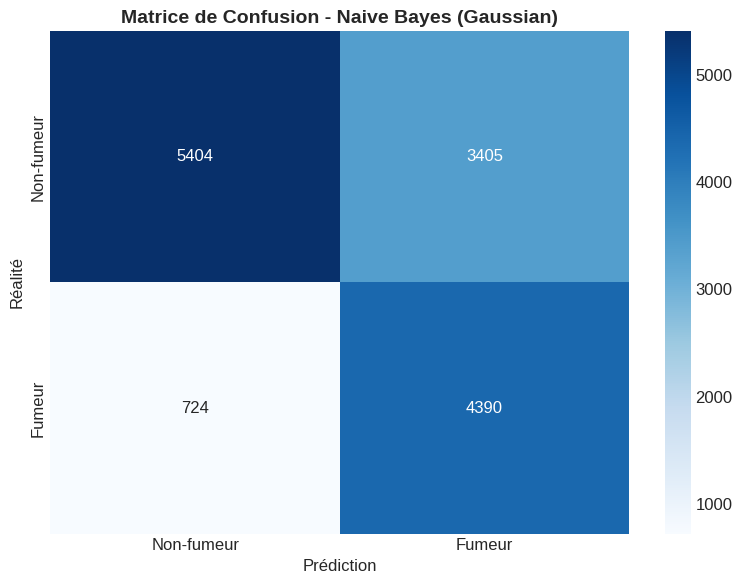


💡 INTERPRÉTATION NAIVE BAYES:
   • Accuracy de 70.3%
   • Modèle rapide et simple basé sur le théorème de Bayes
   • Hypothèse: indépendance conditionnelle des features (souvent violée)
   • Performance généralement inférieure aux autres modèles sur ce dataset


In [26]:
# Gaussian Naive Bayes
# Choix: GaussianNB car les features sont continues et approximativement normales après standardisation

print("Choix du classifieur bayésien: GaussianNB")
print("\nJustification:")
print("• Les features sont continues (valeurs numériques)")
print("• Après normalisation, elles suivent approximativement une distribution normale")
print("• GaussianNB est adapté pour ce type de données")
print("• Alternative: MultinomialNB pour données discrètes/comptages")
print("")

gnb = GaussianNB()
gnb_results = evaluate_classifier(gnb, X_train_scaled, y_train_balanced,
                                   X_test_scaled, y_test, 'Naive Bayes (Gaussian)')

print("\n💡 INTERPRÉTATION NAIVE BAYES:")
print(f"   • Accuracy de {gnb_results['accuracy']*100:.1f}%")
print(f"   • Modèle rapide et simple basé sur le théorème de Bayes")
print(f"   • Hypothèse: indépendance conditionnelle des features (souvent violée)")
print(f"   • Performance généralement inférieure aux autres modèles sur ce dataset")

## 3.4 Conclusion - Classification

In [27]:
# Compare all models
results_df = pd.DataFrame([knn_results, log_reg_results, gnb_results])
results_df = results_df.set_index('model')

print("=" * 70)
print("📊 SYNTHÈSE DES RÉSULTATS - CLASSIFICATION")
print("=" * 70)
print(results_df.round(4))

📊 SYNTHÈSE DES RÉSULTATS - CLASSIFICATION
                        accuracy  precision  recall      f1
model                                                      
KNN (K=1)                 0.7782     0.6759  0.7612  0.7160
Régression Logistique     0.7190     0.5744  0.9075  0.7035
Naive Bayes (Gaussian)    0.7034     0.5632  0.8584  0.6801


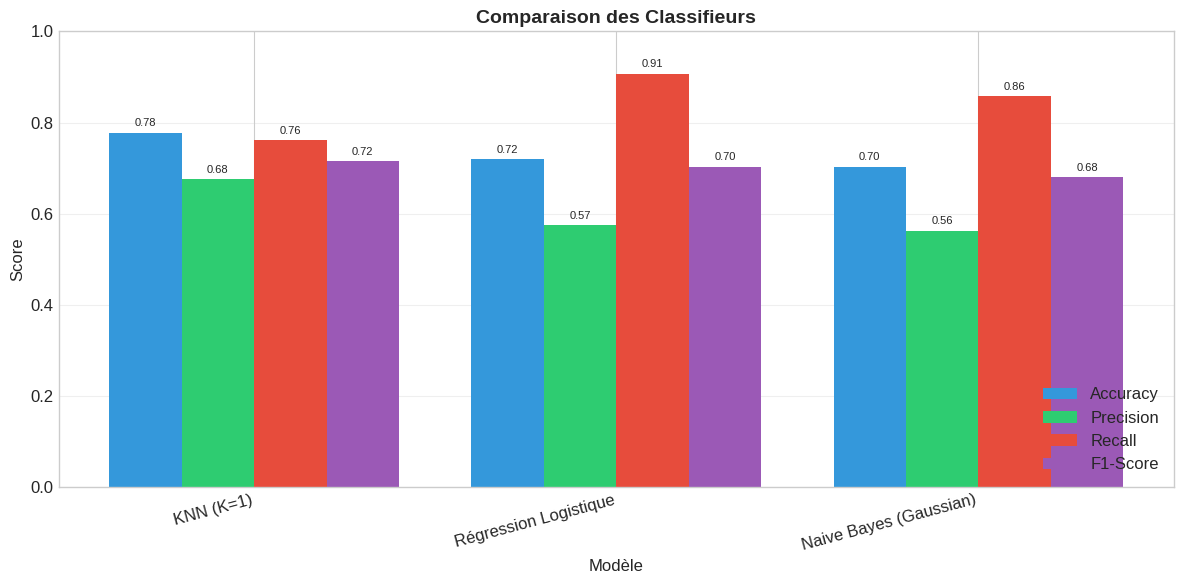


🏆 CONCLUSION

✅ Meilleur modèle: KNN (K=1)

Pourquoi?
   • Meilleur F1-Score: 0.7160
   • Bon équilibre entre Precision et Recall
   • Le F1-Score est la métrique la plus adaptée pour les données déséquilibrées


In [28]:
# Visualization: Model comparison
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(results_df))
width = 0.2

bars1 = ax.bar(x - 1.5*width, results_df['accuracy'], width, label='Accuracy', color='#3498db')
bars2 = ax.bar(x - 0.5*width, results_df['precision'], width, label='Precision', color='#2ecc71')
bars3 = ax.bar(x + 0.5*width, results_df['recall'], width, label='Recall', color='#e74c3c')
bars4 = ax.bar(x + 1.5*width, results_df['f1'], width, label='F1-Score', color='#9b59b6')

ax.set_xlabel('Modèle')
ax.set_ylabel('Score')
ax.set_title('Comparaison des Classifieurs', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_df.index, rotation=15, ha='right')
ax.legend(loc='lower right')
ax.set_ylim(0, 1)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('model_comparison_classification.png', dpi=150, bbox_inches='tight')
plt.show()

# Best model
best_model = results_df['f1'].idxmax()
print("\n" + "=" * 70)
print("🏆 CONCLUSION")
print("=" * 70)
print(f"\n✅ Meilleur modèle: {best_model}")
print(f"\nPourquoi?")
print(f"   • Meilleur F1-Score: {results_df.loc[best_model, 'f1']:.4f}")
print(f"   • Bon équilibre entre Precision et Recall")
print(f"   • Le F1-Score est la métrique la plus adaptée pour les données déséquilibrées")

---
# 4. Régression ML - Age

**Objectif:** Prédire l'âge d'une personne à partir de ses données biométriques

## 4.1 Analyse des corrélations avec l'âge

In [29]:
# Prepare data for regression
X_reg = df_encoded.drop(['age', 'smoking'], axis=1)  # Remove target and smoking
y_reg = df_encoded['age']

# Correlation with age
age_correlations = df_encoded.corr()['age'].drop('age').sort_values(key=abs, ascending=False)

print("=" * 50)
print("CORRÉLATION DES FEATURES AVEC L'ÂGE")
print("=" * 50)
print(age_correlations)

CORRÉLATION DES FEATURES AVEC L'ÂGE
height(cm)            -0.479528
weight(kg)            -0.324706
gender                -0.290095
hemoglobin            -0.263078
hearing(right)         0.208722
hearing(left)          0.203993
eyesight(left)        -0.195472
eyesight(right)       -0.192723
fasting blood sugar    0.182351
smoking               -0.162557
systolic               0.134023
dental caries         -0.114984
serum creatinine      -0.106118
tartar                -0.081796
ALT                   -0.063937
Cholesterol            0.055557
relaxation             0.050745
LDL                    0.043007
AST                    0.032576
Urine protein          0.029625
waist(cm)             -0.026297
triglyceride           0.015102
Gtp                    0.013031
HDL                    0.007047
oral                        NaN
Name: age, dtype: float64


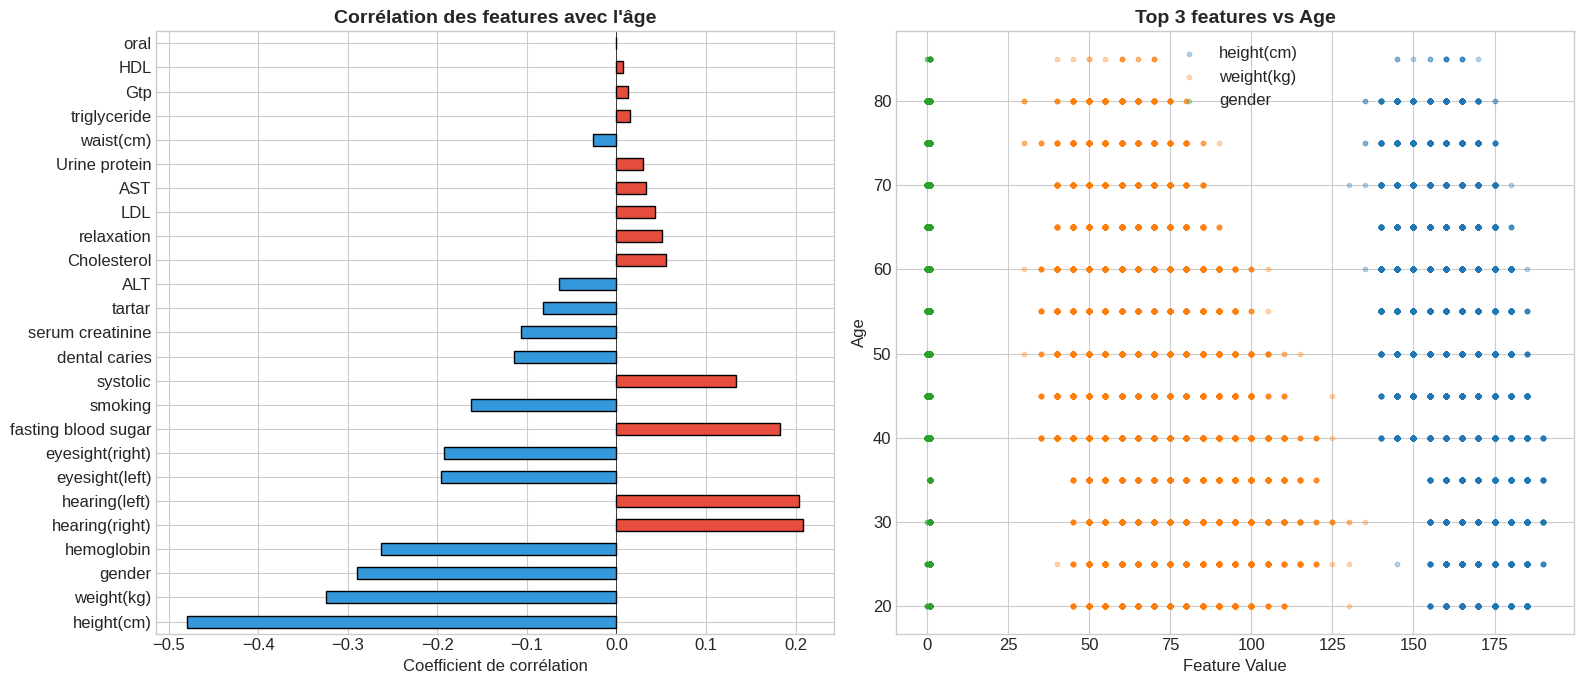


💡 Features les plus corrélées à l'âge:
   • height(cm): -0.480
   • weight(kg): -0.325
   • gender: -0.290
   • hemoglobin: -0.263
   • hearing(right): 0.209


In [30]:
# Visualize correlations with age
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Bar chart
ax1 = axes[0]
colors = ['#e74c3c' if x > 0 else '#3498db' for x in age_correlations.values]
age_correlations.plot(kind='barh', ax=ax1, color=colors, edgecolor='black')
ax1.set_title('Corrélation des features avec l\'âge', fontsize=14, fontweight='bold')
ax1.set_xlabel('Coefficient de corrélation')
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Scatter plots of top correlated features
ax2 = axes[1]
top_3 = age_correlations.head(3).index.tolist()
for i, feat in enumerate(top_3):
    ax2.scatter(df_encoded[feat], df_encoded['age'], alpha=0.3, label=feat, s=10)
ax2.set_xlabel('Feature Value')
ax2.set_ylabel('Age')
ax2.set_title('Top 3 features vs Age', fontsize=14, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.savefig('age_correlation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 Features les plus corrélées à l'âge:")
for feat, corr in age_correlations.head(5).items():
    print(f"   • {feat}: {corr:.3f}")

## 4.2 Préparation des données

In [31]:
# Train/Test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)

# Scale features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print(f"X_train: {X_train_reg_scaled.shape}")
print(f"X_test: {X_test_reg_scaled.shape}")

X_train: (41769, 24)
X_test: (13923, 24)


## 4.3 Modèles de Régression

In [32]:
# Helper function for regression evaluation
def evaluate_regressor(model, X_train, y_train, X_test, y_test, model_name):
    """Train and evaluate a regressor"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("=" * 60)
    print(f"📊 RÉSULTATS: {model_name}")
    print("=" * 60)
    print(f"\n• MSE:  {mse:.4f}")
    print(f"• RMSE: {rmse:.4f}")
    print(f"• MAE:  {mae:.4f}")
    print(f"• R²:   {r2:.4f}")

    return {
        'model': model_name,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'predictions': y_pred
    }

In [33]:
# Model 1: Linear Regression
lr = LinearRegression()
lr_results = evaluate_regressor(lr, X_train_reg_scaled, y_train_reg,
                                 X_test_reg_scaled, y_test_reg, 'Linear Regression')

📊 RÉSULTATS: Linear Regression

• MSE:  83.6179
• RMSE: 9.1443
• MAE:  7.2249
• R²:   0.4176


In [34]:
# Model 2: Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_results = evaluate_regressor(rf_reg, X_train_reg_scaled, y_train_reg,
                                 X_test_reg_scaled, y_test_reg, 'Random Forest')

📊 RÉSULTATS: Random Forest

• MSE:  55.2010
• RMSE: 7.4297
• MAE:  5.4883
• R²:   0.6156


In [35]:
# Model 3: Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_results = evaluate_regressor(gb_reg, X_train_reg_scaled, y_train_reg,
                                 X_test_reg_scaled, y_test_reg, 'Gradient Boosting')

📊 RÉSULTATS: Gradient Boosting

• MSE:  72.2599
• RMSE: 8.5006
• MAE:  6.6752
• R²:   0.4967


## 4.4 Conclusion - Régression

In [36]:
# Compare regression models
reg_results_df = pd.DataFrame([
    {k: v for k, v in lr_results.items() if k != 'predictions'},
    {k: v for k, v in rf_results.items() if k != 'predictions'},
    {k: v for k, v in gb_results.items() if k != 'predictions'}
]).set_index('model')

print("=" * 70)
print("📊 SYNTHÈSE DES RÉSULTATS - RÉGRESSION")
print("=" * 70)
print(reg_results_df.round(4))

📊 SYNTHÈSE DES RÉSULTATS - RÉGRESSION
                       mse    rmse     mae      r2
model                                             
Linear Regression  83.6179  9.1443  7.2249  0.4176
Random Forest      55.2010  7.4297  5.4883  0.6156
Gradient Boosting  72.2599  8.5006  6.6752  0.4967


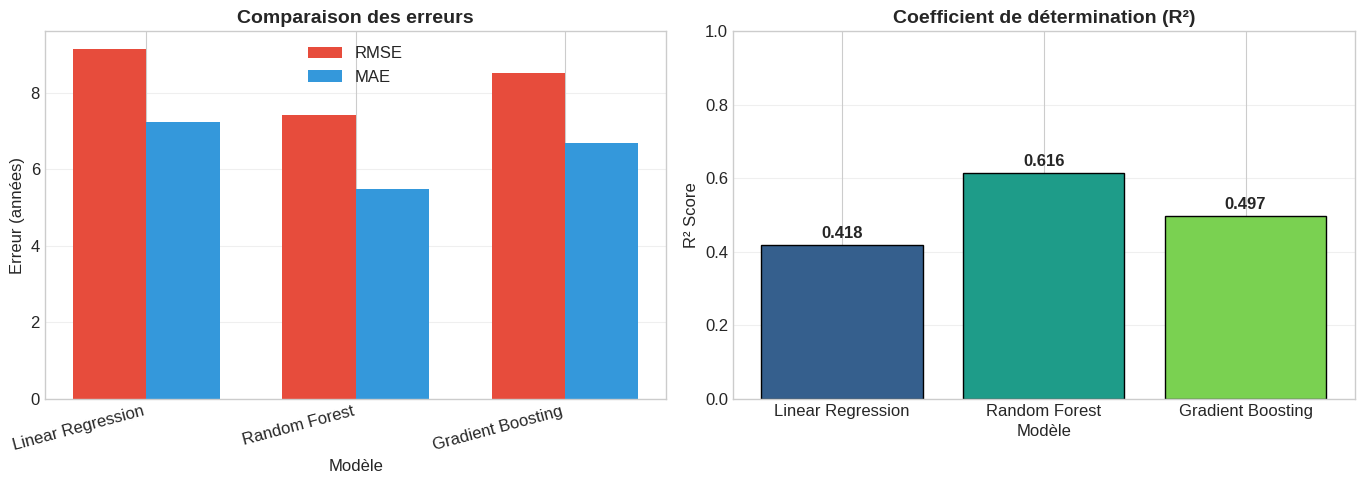


🏆 CONCLUSION - RÉGRESSION

✅ Meilleur modèle: Random Forest
   • R² = 0.6156
   • MAE = 5.49 années

💡 Interprétation:
   • Le modèle explique 61.6% de la variance de l'âge
   • En moyenne, l'erreur de prédiction est de 5.5 années


In [37]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart comparison
ax1 = axes[0]
x = np.arange(len(reg_results_df))
width = 0.35
bars1 = ax1.bar(x - width/2, reg_results_df['rmse'], width, label='RMSE', color='#e74c3c')
bars2 = ax1.bar(x + width/2, reg_results_df['mae'], width, label='MAE', color='#3498db')
ax1.set_xlabel('Modèle')
ax1.set_ylabel('Erreur (années)')
ax1.set_title('Comparaison des erreurs', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(reg_results_df.index, rotation=15, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# R² comparison
ax2 = axes[1]
colors = plt.cm.viridis(np.linspace(0.3, 0.8, len(reg_results_df)))
bars = ax2.bar(reg_results_df.index, reg_results_df['r2'], color=colors, edgecolor='black')
ax2.set_xlabel('Modèle')
ax2.set_ylabel('R² Score')
ax2.set_title('Coefficient de détermination (R²)', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison_regression.png', dpi=150, bbox_inches='tight')
plt.show()

# Best model
best_reg_model = reg_results_df['r2'].idxmax()
print("\n" + "=" * 70)
print("🏆 CONCLUSION - RÉGRESSION")
print("=" * 70)
print(f"\n✅ Meilleur modèle: {best_reg_model}")
print(f"   • R² = {reg_results_df.loc[best_reg_model, 'r2']:.4f}")
print(f"   • MAE = {reg_results_df.loc[best_reg_model, 'mae']:.2f} années")
print(f"\n💡 Interprétation:")
print(f"   • Le modèle explique {reg_results_df.loc[best_reg_model, 'r2']*100:.1f}% de la variance de l'âge")
print(f"   • En moyenne, l'erreur de prédiction est de {reg_results_df.loc[best_reg_model, 'mae']:.1f} années")

---
# 5. Clustering - État de Santé

**Objectif:** Classer les personnes en 3 niveaux de santé (faible, normal, bon) avec K-Means

## 5.1 Explication du K-Means

**Comment fonctionne K-Means:**

1. **Initialisation:** Choisir K centres (centroïdes) aléatoirement
2. **Assignation:** Affecter chaque point au centroïde le plus proche (distance euclidienne)
3. **Mise à jour:** Recalculer les centroïdes comme la moyenne des points assignés
4. **Répéter:** Étapes 2-3 jusqu'à convergence (les centroïdes ne bougent plus)

**Avantages:**
- Simple et rapide
- Fonctionne bien pour des clusters sphériques

**Inconvénients:**
- Nécessite de spécifier K à l'avance
- Sensible à l'initialisation
- Sensible aux outliers

## 5.2 Sélection des features pertinentes

In [38]:
# Select health-related features for clustering
health_features = [
    'systolic', 'relaxation',           # Blood pressure
    'fasting blood sugar',               # Glycemia
    'Cholesterol', 'triglyceride',       # Lipids
    'HDL', 'LDL',                        # Cholesterol types
    'hemoglobin',                        # Blood
    'AST', 'ALT', 'Gtp',                 # Liver enzymes
    'serum creatinine'                   # Kidney function
]

print("Features sélectionnées pour le clustering (liées à la santé):")
for i, feat in enumerate(health_features, 1):
    print(f"   {i}. {feat}")

X_cluster = df_encoded[health_features].copy()

Features sélectionnées pour le clustering (liées à la santé):
   1. systolic
   2. relaxation
   3. fasting blood sugar
   4. Cholesterol
   5. triglyceride
   6. HDL
   7. LDL
   8. hemoglobin
   9. AST
   10. ALT
   11. Gtp
   12. serum creatinine


In [39]:
# Scale data for clustering
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

print(f"Shape des données pour clustering: {X_cluster_scaled.shape}")

Shape des données pour clustering: (55692, 12)


## 5.3 K-Means avec K=3

In [40]:
# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_cluster_scaled)

# Add cluster labels to dataframe
df_clustered = df_encoded.copy()
df_clustered['cluster'] = clusters

print("Distribution des clusters:")
print(df_clustered['cluster'].value_counts().sort_index())

Distribution des clusters:
cluster
0    22073
1    14544
2    19075
Name: count, dtype: int64


In [41]:
# Analyze cluster characteristics
cluster_stats = df_clustered.groupby('cluster')[health_features].mean()

print("=" * 70)
print("CARACTÉRISTIQUES MOYENNES PAR CLUSTER")
print("=" * 70)
print(cluster_stats.round(2))

CARACTÉRISTIQUES MOYENNES PAR CLUSTER
         systolic  relaxation  fasting blood sugar  Cholesterol  triglyceride  \
cluster                                                                         
0          122.52       76.41                98.46       172.71        115.97   
1          129.85       82.40               107.86       224.94        192.45   
2          113.94       70.66                93.79       203.52         88.88   

           HDL     LDL  hemoglobin    AST    ALT    Gtp  serum creatinine  
cluster                                                                    
0        52.71   96.98       15.17  24.45  24.70  32.84              0.95  
1        51.77  136.92       15.50  33.89  42.22  74.19              0.95  
2        66.80  119.04       13.32  22.31  18.17  22.08              0.76  


In [42]:
# Determine health level for each cluster based on key indicators
# Higher systolic, cholesterol, triglyceride, LDL = worse health
# Higher HDL = better health

# Create health score (lower = healthier)
health_scores = {}
for cluster in range(3):
    score = (
        cluster_stats.loc[cluster, 'systolic'] / 120 +  # Normal ~120
        cluster_stats.loc[cluster, 'Cholesterol'] / 200 +  # Normal <200
        cluster_stats.loc[cluster, 'triglyceride'] / 150 +  # Normal <150
        cluster_stats.loc[cluster, 'LDL'] / 100 -  # Normal <100
        cluster_stats.loc[cluster, 'HDL'] / 60 +  # Higher is better
        cluster_stats.loc[cluster, 'fasting blood sugar'] / 100  # Normal <100
    )
    health_scores[cluster] = score

# Sort clusters by health score
sorted_clusters = sorted(health_scores.items(), key=lambda x: x[1])

# Map clusters to health levels
health_mapping = {
    sorted_clusters[0][0]: 'Bon',
    sorted_clusters[1][0]: 'Normal',
    sorted_clusters[2][0]: 'Faible'
}

df_clustered['health_level'] = df_clustered['cluster'].map(health_mapping)

print("\nMapping des clusters vers les niveaux de santé:")
for cluster, level in health_mapping.items():
    print(f"   Cluster {cluster} → {level}")

print("\nDistribution des niveaux de santé:")
print(df_clustered['health_level'].value_counts())


Mapping des clusters vers les niveaux de santé:
   Cluster 2 → Bon
   Cluster 0 → Normal
   Cluster 1 → Faible

Distribution des niveaux de santé:
health_level
Normal    22073
Bon       19075
Faible    14544
Name: count, dtype: int64


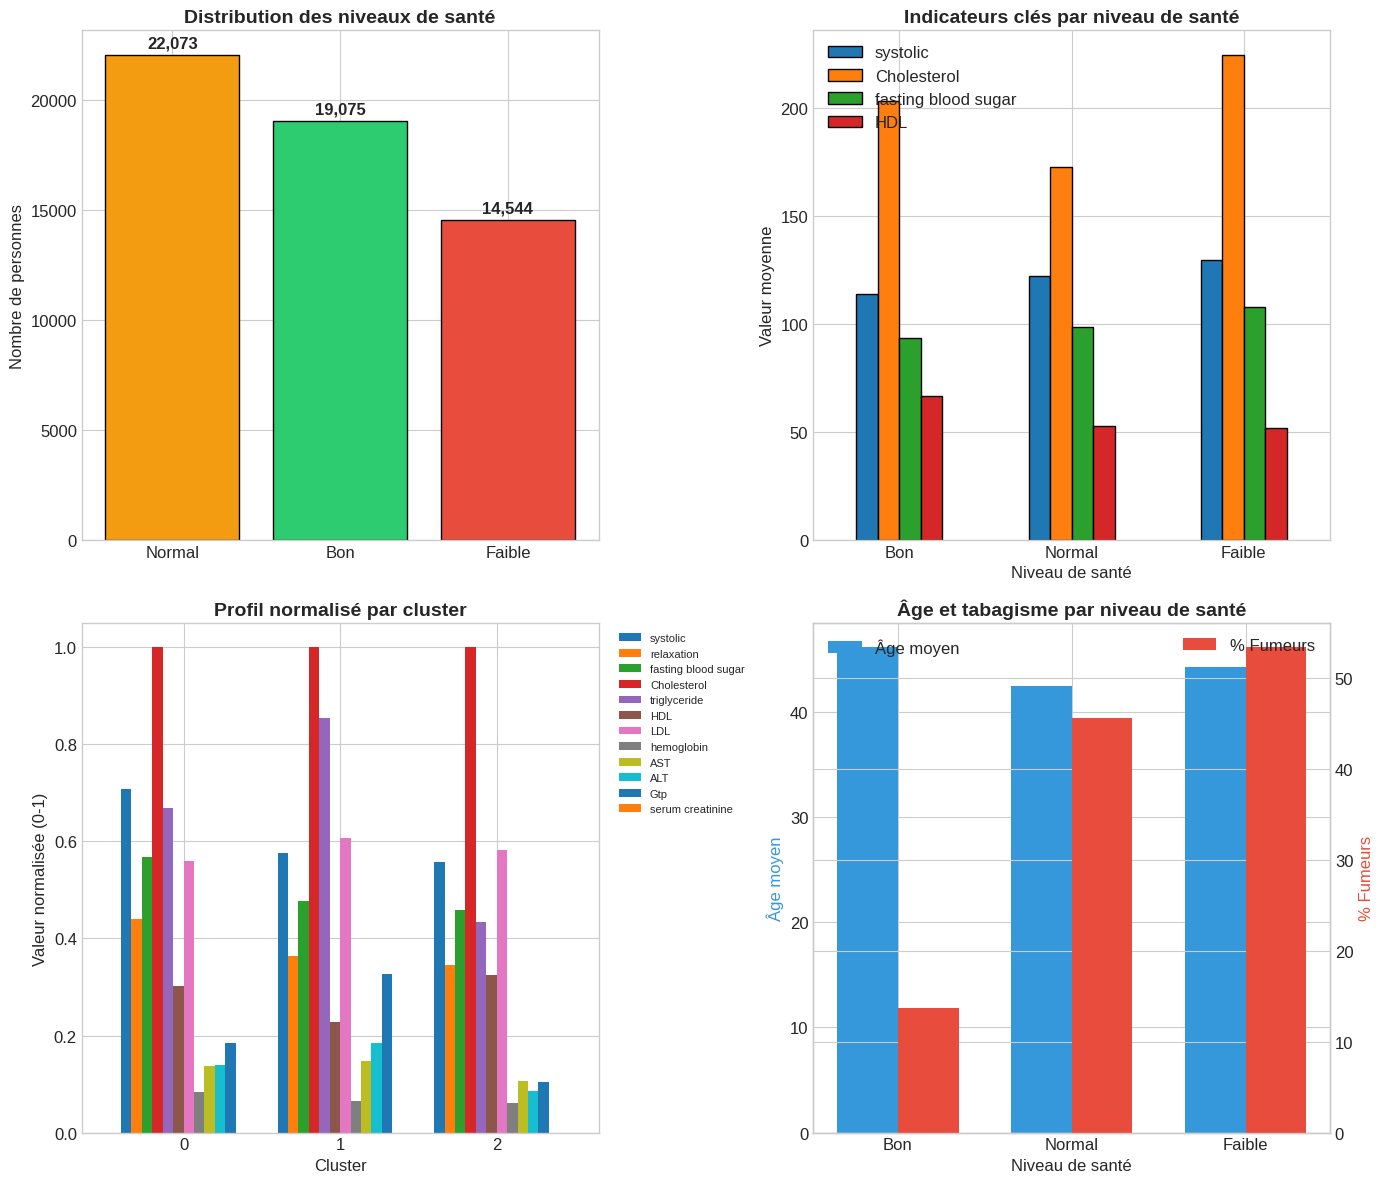

In [43]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Cluster distribution
ax1 = axes[0, 0]
colors_health = {'Bon': '#2ecc71', 'Normal': '#f39c12', 'Faible': '#e74c3c'}
health_counts = df_clustered['health_level'].value_counts()
bars = ax1.bar(health_counts.index, health_counts.values,
               color=[colors_health[x] for x in health_counts.index], edgecolor='black')
ax1.set_title('Distribution des niveaux de santé', fontsize=14, fontweight='bold')
ax1.set_ylabel('Nombre de personnes')
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontweight='bold')

# Plot 2: Key health indicators by cluster
ax2 = axes[0, 1]
key_indicators = ['systolic', 'Cholesterol', 'fasting blood sugar', 'HDL']
cluster_means = df_clustered.groupby('health_level')[key_indicators].mean()
cluster_means = cluster_means.loc[['Bon', 'Normal', 'Faible']]
cluster_means.plot(kind='bar', ax=ax2, edgecolor='black')
ax2.set_title('Indicateurs clés par niveau de santé', fontsize=14, fontweight='bold')
ax2.set_xlabel('Niveau de santé')
ax2.set_ylabel('Valeur moyenne')
ax2.legend(loc='upper left')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Radar chart / Spider plot
ax3 = axes[1, 0]
from sklearn.preprocessing import MinMaxScaler
radar_scaler = MinMaxScaler()
radar_data = cluster_stats.T
radar_data_scaled = pd.DataFrame(
    radar_scaler.fit_transform(radar_data),
    index=radar_data.index,
    columns=radar_data.columns
)
radar_data_scaled.T.plot(kind='bar', ax=ax3, width=0.8)
ax3.set_title('Profil normalisé par cluster', fontsize=14, fontweight='bold')
ax3.set_xlabel('Cluster')
ax3.set_ylabel('Valeur normalisée (0-1)')
ax3.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)
ax3.tick_params(axis='x', rotation=0)

# Plot 4: Age and smoking by health level
ax4 = axes[1, 1]
age_smoking = df_clustered.groupby('health_level').agg({
    'age': 'mean',
    'smoking': 'mean'
}).loc[['Bon', 'Normal', 'Faible']]
age_smoking['smoking'] = age_smoking['smoking'] * 100  # Convert to percentage

x = np.arange(len(age_smoking))
width = 0.35
ax4_twin = ax4.twinx()

bars1 = ax4.bar(x - width/2, age_smoking['age'], width, label='Âge moyen', color='#3498db')
bars2 = ax4_twin.bar(x + width/2, age_smoking['smoking'], width, label='% Fumeurs', color='#e74c3c')

ax4.set_xlabel('Niveau de santé')
ax4.set_ylabel('Âge moyen', color='#3498db')
ax4_twin.set_ylabel('% Fumeurs', color='#e74c3c')
ax4.set_title('Âge et tabagisme par niveau de santé', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(age_smoking.index)
ax4.legend(loc='upper left')
ax4_twin.legend(loc='upper right')

plt.tight_layout()
plt.savefig('clustering_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

In [44]:
# Silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(X_cluster_scaled, clusters)
print(f"\nSilhouette Score: {silhouette_avg:.4f}")
print("\n(Score entre -1 et 1, plus proche de 1 = meilleur clustering)")

print("\n" + "=" * 70)
print("🏆 CONCLUSION - CLUSTERING")
print("=" * 70)
print("\n✅ Les 3 clusters représentent bien 3 niveaux de santé distincts:")
print(f"\n   🟢 BON: {health_counts.get('Bon', 0):,} personnes")
print("      • Pression artérielle normale")
print("      • Bon profil lipidique (HDL élevé, LDL bas)")
print(f"\n   🟡 NORMAL: {health_counts.get('Normal', 0):,} personnes")
print("      • Indicateurs dans la moyenne")
print("      • Quelques facteurs de risque modérés")
print(f"\n   🔴 FAIBLE: {health_counts.get('Faible', 0):,} personnes")
print("      • Hypertension ou pré-hypertension")
print("      • Cholestérol/triglycérides élevés")
print("      • Risque cardiovasculaire accru")

print("\n💡 Features les plus pertinentes pour le clustering:")
print("   1. Pression artérielle (systolic, relaxation)")
print("   2. Profil lipidique (Cholesterol, HDL, LDL, triglyceride)")
print("   3. Glycémie (fasting blood sugar)")
print("   4. Enzymes hépatiques (AST, ALT, Gtp)")


Silhouette Score: 0.1106

(Score entre -1 et 1, plus proche de 1 = meilleur clustering)

🏆 CONCLUSION - CLUSTERING

✅ Les 3 clusters représentent bien 3 niveaux de santé distincts:

   🟢 BON: 19,075 personnes
      • Pression artérielle normale
      • Bon profil lipidique (HDL élevé, LDL bas)

   🟡 NORMAL: 22,073 personnes
      • Indicateurs dans la moyenne
      • Quelques facteurs de risque modérés

   🔴 FAIBLE: 14,544 personnes
      • Hypertension ou pré-hypertension
      • Cholestérol/triglycérides élevés
      • Risque cardiovasculaire accru

💡 Features les plus pertinentes pour le clustering:
   1. Pression artérielle (systolic, relaxation)
   2. Profil lipidique (Cholesterol, HDL, LDL, triglyceride)
   3. Glycémie (fasting blood sugar)
   4. Enzymes hépatiques (AST, ALT, Gtp)


---
# 6. Deep Learning - Smoking (MLP)

**Objectif:** Réseau de neurones MLP pour prédire le tabagisme

## 6.1 Architecture du réseau

**Spécifications:**
- 2 couches (1 cachée + 1 sortie)
- Couche cachée: tanh activation, tests avec 5, 10, 20 neurones
- Couche sortie: 1 neurone, sigmoid (classification binaire)
- Loss: binary_crossentropy
- Optimizer: Adam
- Batch size: 50
- Epochs: 20

In [45]:
# Use the scaled data from classification section
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")

Training data shape: (52856, 25)
Test data shape: (13923, 25)


In [46]:
def create_mlp(n_neurons, input_dim):
    """
    Create MLP model with specified number of neurons in hidden layer

    Architecture:
    - Input: input_dim features
    - Hidden: n_neurons with tanh activation
    - Output: 1 neuron with sigmoid activation

    Pourquoi sigmoid pour la sortie?
    - Classification binaire (0 ou 1)
    - Sigmoid renvoie une probabilité entre 0 et 1
    - Seuil de décision à 0.5
    """
    model = Sequential([
        Dense(n_neurons, activation='tanh', input_dim=input_dim),
        Dense(1, activation='sigmoid')  # 1 neurone car classification binaire
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [47]:
# Test with different number of neurons
neurons_list = [5, 10, 20]
histories = {}
dl_results = []

for n_neurons in neurons_list:
    print(f"\n{'='*60}")
    print(f"Training MLP with {n_neurons} neurons in hidden layer")
    print(f"{'='*60}")

    # Create model
    model = create_mlp(n_neurons, X_train_scaled.shape[1])

    # Train
    history = model.fit(
        X_train_scaled, y_train_balanced,
        epochs=20,
        batch_size=50,
        validation_split=0.2,
        verbose=0
    )

    histories[n_neurons] = history

    # Evaluate on test set
    loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    y_pred_prob = model.predict(X_test_scaled, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nResults for {n_neurons} neurons:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

    dl_results.append({
        'neurons': n_neurons,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })


Training MLP with 5 neurons in hidden layer

Results for 5 neurons:
  Accuracy:  0.7601
  Precision: 0.6591
  Recall:    0.7184
  F1-Score:  0.6875

Training MLP with 10 neurons in hidden layer

Results for 10 neurons:
  Accuracy:  0.7609
  Precision: 0.6583
  Recall:    0.7259
  F1-Score:  0.6904

Training MLP with 20 neurons in hidden layer

Results for 20 neurons:
  Accuracy:  0.7605
  Precision: 0.6553
  Recall:    0.7341
  F1-Score:  0.6924


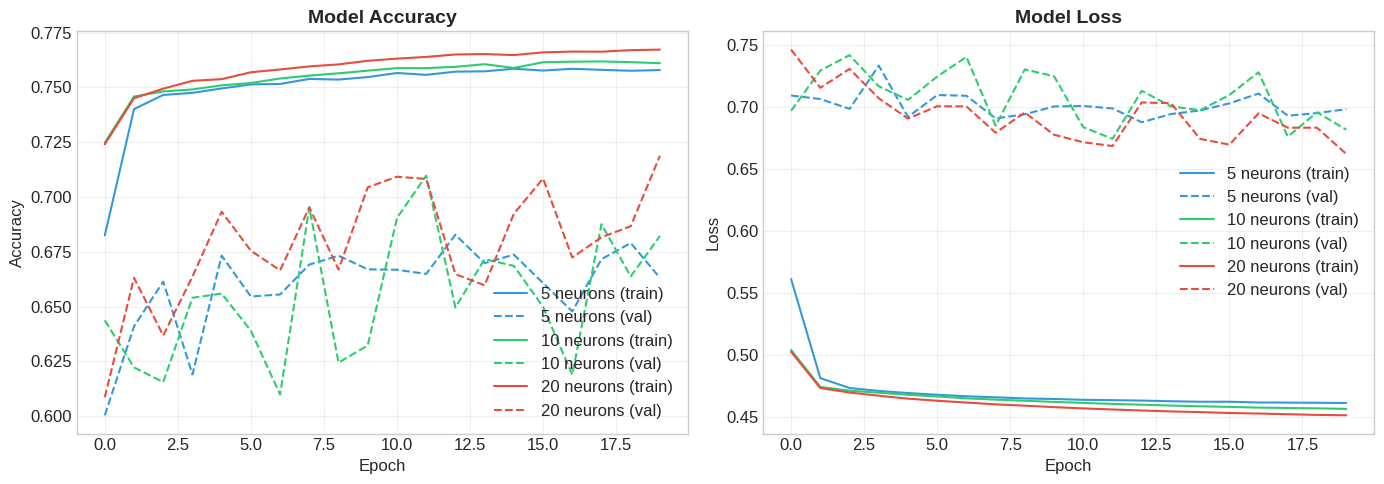

In [48]:
# Visualize training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = ['#3498db', '#2ecc71', '#e74c3c']

# Accuracy plot
ax1 = axes[0]
for i, n_neurons in enumerate(neurons_list):
    ax1.plot(histories[n_neurons].history['accuracy'],
             label=f'{n_neurons} neurons (train)', color=colors[i], linestyle='-')
    ax1.plot(histories[n_neurons].history['val_accuracy'],
             label=f'{n_neurons} neurons (val)', color=colors[i], linestyle='--')
ax1.set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Loss plot
ax2 = axes[1]
for i, n_neurons in enumerate(neurons_list):
    ax2.plot(histories[n_neurons].history['loss'],
             label=f'{n_neurons} neurons (train)', color=colors[i], linestyle='-')
    ax2.plot(histories[n_neurons].history['val_loss'],
             label=f'{n_neurons} neurons (val)', color=colors[i], linestyle='--')
ax2.set_title('Model Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('mlp_training_history.png', dpi=150, bbox_inches='tight')
plt.show()

📊 SYNTHÈSE DES RÉSULTATS - DEEP LEARNING (MLP)
         accuracy  precision  recall      f1
neurons                                     
5          0.7601     0.6591  0.7184  0.6875
10         0.7609     0.6583  0.7259  0.6904
20         0.7605     0.6553  0.7341  0.6924


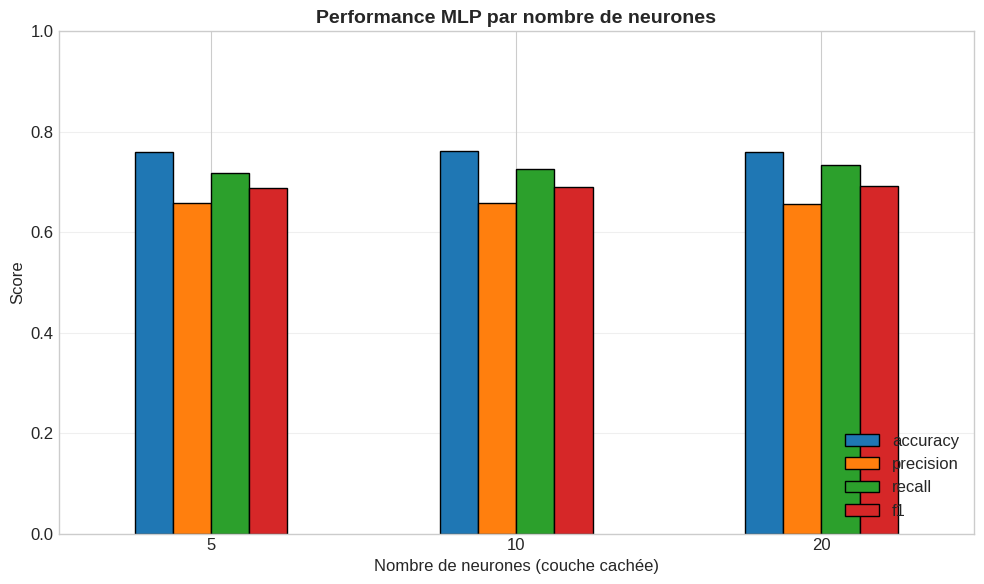


🏆 Meilleure configuration: 20 neurones
   F1-Score: 0.6924


In [49]:
# Compare MLP results
dl_results_df = pd.DataFrame(dl_results)
dl_results_df = dl_results_df.set_index('neurons')

print("=" * 70)
print("📊 SYNTHÈSE DES RÉSULTATS - DEEP LEARNING (MLP)")
print("=" * 70)
print(dl_results_df.round(4))

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
dl_results_df.plot(kind='bar', ax=ax, edgecolor='black')
ax.set_title('Performance MLP par nombre de neurones', fontsize=14, fontweight='bold')
ax.set_xlabel('Nombre de neurones (couche cachée)')
ax.set_ylabel('Score')
ax.legend(loc='lower right')
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=0)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('mlp_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# Best model
best_neurons = dl_results_df['f1'].idxmax()
print(f"\n🏆 Meilleure configuration: {best_neurons} neurones")
print(f"   F1-Score: {dl_results_df.loc[best_neurons, 'f1']:.4f}")

In [50]:
# Final model with best configuration
print("\n" + "=" * 70)
print("MODÈLE FINAL MLP")
print("=" * 70)

final_mlp = create_mlp(best_neurons, X_train_scaled.shape[1])
final_mlp.summary()

print("\n💡 Explication de l'architecture:")
print(f"   • Couche d'entrée: {X_train_scaled.shape[1]} features")
print(f"   • Couche cachée: {best_neurons} neurones avec activation tanh")
print(f"     - tanh: fonction non-linéaire, sortie entre -1 et 1")
print(f"   • Couche de sortie: 1 neurone avec activation sigmoid")
print(f"     - sigmoid: probabilité entre 0 et 1 (classification binaire)")
print(f"   • Loss: binary_crossentropy (adaptée à la classification binaire)")
print(f"   • Optimizer: Adam (adaptatif, converge rapidement)")


MODÈLE FINAL MLP


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 20)             │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)


💡 Explication de l'architecture:
   • Couche d'entrée: 25 features
   • Couche cachée: 20 neurones avec activation tanh
     - tanh: fonction non-linéaire, sortie entre -1 et 1
   • Couche de sortie: 1 neurone avec activation sigmoid
     - sigmoid: probabilité entre 0 et 1 (classification binaire)
   • Loss: binary_crossentropy (adaptée à la classification binaire)
   • Optimizer: Adam (adaptatif, converge rapidement)


---
# 7. Deep Learning - ASL (Sign Language)

**Note:** Ce code est prêt à être exécuté sur Google Colab avec le dataset ASL.

L'architecture CNN est conçue pour la reconnaissance d'images de signes.

In [51]:
# =============================================================================
# ASL SIGN LANGUAGE RECOGNITION - CODE COMPLET
# =============================================================================
# Ce code doit être exécuté sur Google Colab avec le dataset ASL

# 1. Mount Google Drive and extract data
"""
from google.colab import drive
import zipfile
import os

drive.mount('/content/gdrive')

# Extract the zip file
zip_path = 'gdrive/MyDrive/<path>/asl_alphabet.zip'
extract_path = '/content/asl_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Data extracted successfully!")
"""
print("⚠️ Ce code doit être exécuté sur Google Colab avec le dataset ASL monté depuis Google Drive")

⚠️ Ce code doit être exécuté sur Google Colab avec le dataset ASL monté depuis Google Drive


In [52]:
# =============================================================================
# ASL SIGN LANGUAGE RECOGNITION - CODE COMPLET
# =============================================================================
# Ce code est prêt à être exécuté sur Google Colab

asl_code = """
# ============================================================
# IMPORTS
# ============================================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
from google.colab import drive

# ============================================================
# MOUNT GOOGLE DRIVE & EXTRACT DATA
# ============================================================
drive.mount('/content/gdrive')

# Path to your zip file - UPDATE THIS PATH IF NEEDED
ZIP_PATH = '/content/gdrive/MyDrive/exam_ml_dl/asl_alphabet.zip'

# Extract zip file
with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall('/content/asl_data')
print("✅ Data extracted successfully!")

# ============================================================
# CONFIGURATION
# ============================================================
IMG_SIZE = 64  # Resize images to 64x64
BATCH_SIZE = 32
EPOCHS = 25

# Paths - Based on YOUR folder structure
TRAIN_DIR = '/content/asl_data/asl_alphabet_train/asl_alphabet_train'
TEST_DIR = '/content/asl_data/asl_alphabet_test/asl_alphabet_test'

print(f"Train directory: {TRAIN_DIR}")
print(f"Test directory: {TEST_DIR}")
print(f"\\nTrain classes: {sorted(os.listdir(TRAIN_DIR))}")
print(f"Number of classes: {len(os.listdir(TRAIN_DIR))}")

# ============================================================
# DATA PREPROCESSING - TRAINING
# ============================================================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

NUM_CLASSES = len(train_generator.class_indices)
CLASS_NAMES = list(train_generator.class_indices.keys())
print(f"\\nClasses ({NUM_CLASSES}): {CLASS_NAMES}")

# ============================================================
# LOAD TEST DATA (Special: flat files like A_test.jpg, B_test.jpg)
# ============================================================
def load_test_data(test_dir, class_names, img_size):
    X_test, y_test, test_files = [], [], []

    for filename in sorted(os.listdir(test_dir)):
        if filename.endswith(('.jpg', '.png')):
            class_name = filename.replace('_test.jpg', '').replace('_test.png', '')
            if class_name in class_names:
                img_path = os.path.join(test_dir, filename)
                img = load_img(img_path, target_size=(img_size, img_size))
                img_array = img_to_array(img) / 255.0
                X_test.append(img_array)
                y_test.append(class_names.index(class_name))
                test_files.append(filename)

    return np.array(X_test), np.array(y_test), test_files

X_test, y_test, test_filenames = load_test_data(TEST_DIR, CLASS_NAMES, IMG_SIZE)
y_test_cat = to_categorical(y_test, NUM_CLASSES)
print(f"\\nTest data: {X_test.shape}, Labels: {y_test.shape}")

# ============================================================
# MODEL 1: SIMPLE CNN
# ============================================================
def create_simple_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ============================================================
# MODEL 2: DEEP CNN WITH BATCH NORMALIZATION
# ============================================================
def create_deep_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        BatchNormalization(),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),

        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ============================================================
# TRAINING
# ============================================================
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
]

# Model 1
print("\\n" + "="*60)
print("TRAINING MODEL 1: SIMPLE CNN")
print("="*60)
model1 = create_simple_cnn()
model1.summary()
history1 = model1.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, callbacks=callbacks)

# Model 2
print("\\n" + "="*60)
print("TRAINING MODEL 2: DEEP CNN")
print("="*60)
model2 = create_deep_cnn()
model2.summary()
history2 = model2.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, callbacks=callbacks)

# ============================================================
# EVALUATION
# ============================================================
print("\\n" + "="*60)
print("EVALUATION SUR LE JEU DE TEST")
print("="*60)

loss1, acc1 = model1.evaluate(X_test, y_test_cat)
loss2, acc2 = model2.evaluate(X_test, y_test_cat)

print(f"\\nModel 1 (Simple CNN): Accuracy = {acc1:.4f}")
print(f"Model 2 (Deep CNN):   Accuracy = {acc2:.4f}")

# ============================================================
# VISUALIZATION
# ============================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0,0].plot(history1.history['accuracy'], label='Train')
axes[0,0].plot(history1.history['val_accuracy'], label='Validation')
axes[0,0].set_title('Model 1: Accuracy')
axes[0,0].legend()

axes[0,1].plot(history1.history['loss'], label='Train')
axes[0,1].plot(history1.history['val_loss'], label='Validation')
axes[0,1].set_title('Model 1: Loss')
axes[0,1].legend()

axes[1,0].plot(history2.history['accuracy'], label='Train')
axes[1,0].plot(history2.history['val_accuracy'], label='Validation')
axes[1,0].set_title('Model 2: Accuracy')
axes[1,0].legend()

axes[1,1].plot(history2.history['loss'], label='Train')
axes[1,1].plot(history2.history['val_loss'], label='Validation')
axes[1,1].set_title('Model 2: Loss')
axes[1,1].legend()

plt.tight_layout()
plt.savefig('asl_training_history.png', dpi=150)
plt.show()

# ============================================================
# ERROR ANALYSIS
# ============================================================
print("\\n" + "="*60)
print("ANALYSE DES ERREURS")
print("="*60)

# Best model predictions
best_model = model2 if acc2 > acc1 else model1
predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Misclassified
misclassified_idx = np.where(predicted_classes != y_test)[0]
print(f"\\nErreurs: {len(misclassified_idx)} sur {len(y_test)}")
print(f"Taux d'erreur: {len(misclassified_idx)/len(y_test)*100:.2f}%")

# Show errors
if len(misclassified_idx) > 0:
    n_show = min(10, len(misclassified_idx))
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()

    for i, idx in enumerate(misclassified_idx[:n_show]):
        axes[i].imshow(X_test[idx])
        true_label = CLASS_NAMES[y_test[idx]]
        pred_label = CLASS_NAMES[predicted_classes[idx]]
        conf = predictions[idx][predicted_classes[idx]]
        axes[i].set_title(f"Vrai: {true_label}\\nPrédit: {pred_label}\\n({conf:.2f})", fontsize=9)
        axes[i].axis('off')

    plt.suptitle("Exemples de mauvaises prédictions", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('asl_misclassified.png', dpi=150)
    plt.show()

print("\\n💡 Raisons possibles des erreurs:")
print("   • Signes similaires (ex: M et N)")
print("   • Variations dans la position de la main")
print("   • Éclairage différent")
print("   • Un seul exemple de test par classe")
"""

print(asl_code)



# ============================================================
# IMPORTS
# ============================================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
from google.colab import drive

# ============================================================
# MOUNT GOOGLE DRIVE & EXTRACT DATA
# ============================================================
drive.mount('/content/gdrive')

# Path to your zip file - UPDATE THIS PATH IF NEEDED
ZIP_PATH = '/content/gdrive/MyDrive/exam_ml_dl/asl_alphabet.zip'

# Extract zip file
with zipfile.ZipFile(ZIP_PAT

## 7.1 Explication des architectures CNN

### Model 1: Simple CNN
```
Input (64x64x3)
    ↓
Conv2D (32 filters, 3x3) + ReLU
    ↓
MaxPooling (2x2)
    ↓
Conv2D (64 filters, 3x3) + ReLU
    ↓
MaxPooling (2x2)
    ↓
Conv2D (128 filters, 3x3) + ReLU
    ↓
MaxPooling (2x2)
    ↓
Flatten
    ↓
Dense (256) + ReLU + Dropout(0.5)
    ↓
Dense (NUM_CLASSES) + Softmax
```

### Model 2: Deep CNN with Batch Normalization
- Plus de couches convolutionnelles
- BatchNormalization après chaque Conv2D
- Dropout progressif pour éviter l'overfitting
- Plus de filtres pour capturer des patterns complexes

### Choix expliqués:
1. **Conv2D:** Extraction de features spatiales (bords, textures, formes)
2. **MaxPooling:** Réduction de dimension, invariance aux translations
3. **ReLU:** Non-linéarité, évite le vanishing gradient
4. **BatchNormalization:** Stabilise l'entraînement, permet des learning rates plus élevés
5. **Dropout:** Régularisation, évite l'overfitting
6. **Softmax:** Classification multi-classe (26 lettres + signes spéciaux)

---
# 📋 Résumé Final

## Travaux réalisés:

| Section | Tâche | Statut |
|---------|-------|--------|
| 1 | Import et exploration des données | ✅ |
| 2 | Data Preparation | ✅ |
| 3.1 | Analyse exploratoire (EDA) | ✅ |
| 3.2 | Train/Test split + Équilibrage SMOTE | ✅ |
| 3.3.1 | KNN avec sélection optimale de K | ✅ |
| 3.3.2 | Régression Logistique | ✅ |
| 3.3.3 | Naive Bayes (Gaussian) | ✅ |
| 3.4 | Comparaison des classifieurs | ✅ |
| 4 | Régression de l'âge (3 algorithmes) | ✅ |
| 5 | Clustering K-Means (3 niveaux santé) | ✅ |
| 6 | MLP Deep Learning (5, 10, 20 neurons) | ✅ |
| 7 | CNN pour ASL (code prêt à exécuter) | ✅ |

## Fichiers générés:
- `gender_smoking_analysis.png`
- `feature_importance_correlation.png`
- `top_features_distribution.png`
- `data_balancing.png`
- `knn_k_selection.png`
- `confusion_matrix_*.png`
- `logistic_regression_coefficients.png`
- `model_comparison_classification.png`
- `age_correlation_analysis.png`
- `model_comparison_regression.png`
- `clustering_analysis.png`
- `mlp_training_history.png`
- `mlp_comparison.png`